# /*******************************************************
* Copyright         : 2023 Vaibhav Khandare
* Description       : This file content is predict the devnagri letters
*                    
* Revision History  :
* 		Author 		
        Vaibhav Khandare 
* ------------------------------------------------------------------
/******************************************************************/

In [ ]:
from os import listdir

In [2]:
from keras.preprocessing import image 

In [3]:
train_data = listdir('.\DEVNAGARI_NEW\TRAIN')

In [4]:
test_data = listdir('.\DEVNAGARI_NEW\TEST')

In [5]:
X_train = []
y_train = []

for i in train_data:
    for j in listdir('./DEVNAGARI_NEW/TRAIN/' + i):
                     img =  image.load_img('./DEVNAGARI_NEW/TRAIN/'+ i +'/' + j)
                     img = image.img_to_array(img)                     
                     X_train.append(img)
                     y_train.append(i)                       
                     
                     

In [6]:
import numpy as np

In [7]:
X_train = np.array(X_train)

In [8]:
X_train.shape

(6528, 28, 28, 3)

In [9]:
y_train = np.array(y_train)

In [10]:
y_train.shape

(6528,)

In [11]:
X_test = []
y_test = []

for i in test_data:
    for j in listdir('./DEVNAGARI_NEW/TEST/' + i):
                     img =  image.load_img('./DEVNAGARI_NEW/TEST/'+ i +'/' + j)
                     img = image.img_to_array(img)                     
                     X_test.append(img)
                     y_test.append(i) 

In [12]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
X_test.shape

(3312, 28, 28, 3)

In [14]:
y_test.shape

(3312,)

In [15]:
X_train_set = np.reshape(X_train, (-1, 28*28*3))

In [16]:
X_train_set.shape

(6528, 2352)

In [17]:
X_test_set = np.reshape(X_test, (-1, 28*28*3))

In [18]:
X_test_set.shape

(3312, 2352)

In [34]:
X_test

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [250., 250., 250.],
         ...,
         [ 56.,  56.,  56.],
         [ 19.,  19.,  19.],
         [152., 152., 152.]],

        [[254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [ 41.,  41.,  41.],
         [ 42.,  42.,  42.],
         [162., 162., 162.]],

        [[255., 255., 255.],
         [252., 252., 252.],
         [255., 255., 255.],
         ...,
         [195., 195., 195.],
         [174., 174., 174.],
         [214., 214., 214.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [253., 253., 253.],
         [254., 254., 254.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [253., 253., 253.],
         [254., 254., 254.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [35]:
import matplotlib.pyplot as plt

In [40]:
xx = X_test[15]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


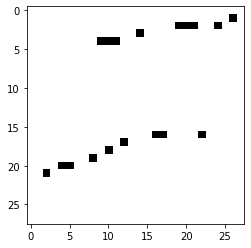

In [41]:
plt.imshow(xx)

In [19]:
y_train

array(['1', '1', '1', ..., '9', '9', '9'], dtype='<U2')

In [20]:
import pandas as pd

In [21]:
y_train_cat = pd.get_dummies(y_train)

In [22]:
y_train_cat

,1,10,11,12,13,14,15,16,17,18,...,44,45,46,47,48,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
from keras.models import Sequential

In [24]:
model = Sequential()

In [25]:
from keras.layers import Dense

In [26]:
model.add(
    Dense(units = 128, 
        activation = 'relu', 
        kernel_initializer = 'he_normal', 
        input_shape = (28*28*3, )))

In [27]:
model.add(
    Dense(units = 64, 
        activation = 'relu', 
        kernel_initializer = 'he_normal'))

In [28]:
model.add(
    Dense(units = 32, 
        activation = 'relu', 
        kernel_initializer = 'he_normal'))

In [29]:
model.add(
    Dense(units = 16, 
        activation = 'relu', 
        kernel_initializer = 'he_normal'))

In [30]:
model.add(
    Dense(units = 48, 
        activation = 'softmax'))

In [31]:
from keras.optimizers import RMSprop

In [32]:
model.compile(optimizer=RMSprop(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'] )

In [33]:
model.fit(X_train_set, y_train_cat, epochs=50)

Epoch 1/50
204/204 [==============================] - 37s 10ms/step - loss: 894.2686 - accuracy: 0.0207
Epoch 2/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8753 - accuracy: 0.0153
Epoch 3/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8748 - accuracy: 0.0187
Epoch 4/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8746 - accuracy: 0.0204
Epoch 5/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8745 - accuracy: 0.0224
Epoch 6/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8746 - accuracy: 0.0199
Epoch 7/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8746 - accuracy: 0.0169
Epoch 8/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8742 - accuracy: 0.0199
Epoch 9/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8746 - accuracy: 0.0138
Epoch 10/50
204/204 [==============================] - 2s 10ms/step - loss: 3.8744 - acc

In [44]:
predict = model.predict(X_test_set)

In [45]:
predict

array([[0.02192817, 0.01942171, 0.02111064, ..., 0.0197516 , 0.02168238,
        0.02228777],
       [0.02192817, 0.01942171, 0.02111064, ..., 0.0197516 , 0.02168238,
        0.02228777],
       [0.02192817, 0.01942171, 0.02111064, ..., 0.0197516 , 0.02168238,
        0.02228777],
       ...,
       [0.02192817, 0.01942171, 0.02111064, ..., 0.0197516 , 0.02168238,
        0.02228777],
       [0.02192817, 0.01942171, 0.02111064, ..., 0.0197516 , 0.02168238,
        0.02228777],
       [0.02192817, 0.01942171, 0.02111064, ..., 0.0197516 , 0.02168238,
        0.02228777]], dtype=float32)

In [47]:
pre1 = X_test_set[0]

In [48]:
pre1

array([255., 255., 255., ..., 255., 255., 255.], dtype=float32)

In [55]:
pre1 = np.reshape(pre1, (1,2352))

In [56]:
pre1.shape

(1, 2352)

In [57]:
model.predict(pre1)

array([[0.02192817, 0.01942171, 0.02111064, 0.02018522, 0.02218046,
        0.02148763, 0.01995365, 0.01991918, 0.02107402, 0.02028578,
        0.01951303, 0.02246693, 0.02051331, 0.02111322, 0.02028001,
        0.02080146, 0.02135814, 0.02220554, 0.01983043, 0.02094094,
        0.01871409, 0.02047347, 0.0214787 , 0.02082739, 0.02207407,
        0.02168268, 0.02133414, 0.02068727, 0.01969673, 0.0201022 ,
        0.02049827, 0.02126986, 0.02110864, 0.02051361, 0.02081074,
        0.02098241, 0.02130338, 0.01983411, 0.02003555, 0.02042337,
        0.0214075 , 0.02043148, 0.0220206 , 0.02095774, 0.02104084,
        0.0197516 , 0.02168238, 0.02228777]], dtype=float32)

In [58]:
y_train_cat

,1,10,11,12,13,14,15,16,17,18,...,44,45,46,47,48,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
pre2 =  X_test_set[250]

In [60]:
pre2

array([230., 230., 230., ..., 252., 252., 252.], dtype=float32)

In [62]:
pre2 = np.reshape(pre1, (1,2352))

In [63]:
pre2.shape

(1, 2352)

In [64]:
model.predict(pre2)

array([[0.02192817, 0.01942171, 0.02111064, 0.02018522, 0.02218046,
        0.02148763, 0.01995365, 0.01991918, 0.02107402, 0.02028578,
        0.01951303, 0.02246693, 0.02051331, 0.02111322, 0.02028001,
        0.02080146, 0.02135814, 0.02220554, 0.01983043, 0.02094094,
        0.01871409, 0.02047347, 0.0214787 , 0.02082739, 0.02207407,
        0.02168268, 0.02133414, 0.02068727, 0.01969673, 0.0201022 ,
        0.02049827, 0.02126986, 0.02110864, 0.02051361, 0.02081074,
        0.02098241, 0.02130338, 0.01983411, 0.02003555, 0.02042337,
        0.0214075 , 0.02043148, 0.0220206 , 0.02095774, 0.02104084,
        0.0197516 , 0.02168238, 0.02228777]], dtype=float32)